<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Извлечение-данных" data-toc-modified-id="Извлечение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Извлечение данных</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Необходимые-данные" data-toc-modified-id="Необходимые-данные-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Необходимые данные</a></span></li><li><span><a href="#Маштабирование-и-кодирование" data-toc-modified-id="Маштабирование-и-кодирование-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Маштабирование и кодирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных 

**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата  

**Целевой признак**
- Exited — факт ухода клиента

## Подготовка данных

### Извлечение данных

Как обычно подгружаем необходжимые библиотеки и достаем данные.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
import warnings

In [2]:
df = pd.read_csv("./Churn.csv")

Взгляним на них.

In [3]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8203,8204,15588566,Wilkinson,778,Spain,Male,33,5.0,116474.28,2,1,1,32757.55,0
9501,9502,15634146,Hou,835,Germany,Male,18,2.0,142872.36,1,1,1,117632.63,0
1549,1550,15584364,Trentini,652,France,Male,48,4.0,59486.31,1,1,0,163944.18,1
6299,6300,15575679,Lori,590,France,Male,24,7.0,126431.54,1,1,0,58781.11,0
1532,1533,15589660,Lamble,661,Germany,Female,32,1.0,145980.23,1,0,1,56636.28,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Пропуски

В столбце "Tenure" есть пропуски посмотри связаныли они с чем-то.

In [11]:
df.loc[df["Tenure"].isna()] 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Как видно данный пропуск является скорее всего технической ошибкой и ни как не свявзан с остальными данными. Востановить данный стобец нет возмоности, а заполнять средним или каким-либо другим значением может быть критично для модели, по этому просто отсечем данные строки.

In [12]:
df = df.loc[df["Tenure"].notna()]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


### Необходимые данные

Теперь для дальнешей работы необходимо оставить нужные столбцы для модели: 
- CreditScore
- Geography
- Gender
- Age
- Tenure
- Balance
- NumOfProducts
- HasCrCard
- IsActiveMember
- EstimatedSalary
- Exited

Кажется, что эта информация может повлияет на выбор клиента. 

In [14]:
df_train = df[["CreditScore",
              "Geography",
              "Gender",
              "Age",
              "Tenure",
              "Balance",
              "NumOfProducts",
              "HasCrCard",
              "IsActiveMember",
              "EstimatedSalary",
              "Exited"]]

In [15]:
df_train.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5920,698,France,Male,36,6.0,0.0,2,0,1,19231.98,0


### Маштабирование и кодирование

Теперь нужно все численные метрики подвести под один маштаб, а категориальные в чилсенные.

In [16]:
df_train = pd.get_dummies(df_train, drop_first= True)

In [17]:
df_train.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
6316,725,37,6.0,124348.38,2,0,1,176984.34,0,0,0,1


Категориальыне метрики переведены, теперь займемся численными.

In [18]:
column = ["CreditScore","Tenure", "Age", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = StandardScaler().fit(df_train[column])
df_train[column] = scaler.transform(df_train[column])
df_train.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
4547,2.066937,-0.184669,1.382699,0.737791,-0.912601,0,1,1.727003,1,1,0,1


Теперь данные готовы для дальнейшей работы.

### Вывод

Полностью предобработали данные для дальнейшего их деления на выборки и обучение моделей

## Исследование задачи

Поделим выборки на тренировочную и тестовую. Валидационная не понадобится так-как будем использовать GridSearchCV там есть кроссвалидация

In [19]:
train, test = train_test_split(df_train, test_size=.25, random_state=46812)

In [20]:
display(train.info())
train.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 382 to 6261
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6818 non-null   float64
 1   Age                6818 non-null   float64
 2   Tenure             6818 non-null   float64
 3   Balance            6818 non-null   float64
 4   NumOfProducts      6818 non-null   float64
 5   HasCrCard          6818 non-null   int64  
 6   IsActiveMember     6818 non-null   int64  
 7   EstimatedSalary    6818 non-null   float64
 8   Exited             6818 non-null   int64  
 9   Geography_Germany  6818 non-null   uint8  
 10  Geography_Spain    6818 non-null   uint8  
 11  Gender_Male        6818 non-null   uint8  
dtypes: float64(6), int64(3), uint8(3)
memory usage: 552.6 KB


None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
7654,-0.381064,-0.089927,-0.344677,-0.063035,-0.912601,1,1,-0.418918,0,0,0,0
6350,-0.111369,0.857491,-1.381103,0.562791,-0.912601,0,1,0.621544,0,1,0,1
7349,-0.194352,0.289040,0.346273,-0.265547,0.808655,0,1,0.832878,0,1,0,1


In [21]:
display(test.info())
test.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 3433 to 5742
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2273 non-null   float64
 1   Age                2273 non-null   float64
 2   Tenure             2273 non-null   float64
 3   Balance            2273 non-null   float64
 4   NumOfProducts      2273 non-null   float64
 5   HasCrCard          2273 non-null   int64  
 6   IsActiveMember     2273 non-null   int64  
 7   EstimatedSalary    2273 non-null   float64
 8   Exited             2273 non-null   int64  
 9   Geography_Germany  2273 non-null   uint8  
 10  Geography_Spain    2273 non-null   uint8  
 11  Gender_Male        2273 non-null   uint8  
dtypes: float64(6), int64(3), uint8(3)
memory usage: 184.2 KB


None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
911,-0.028386,1.331200,0.346273,0.556407,-0.912601,1,1,0.370713,0,0,1,0
9170,0.448767,-0.847862,-1.035627,-1.227780,2.529911,0,1,-1.477603,0,0,0,1
8872,0.355411,-0.847862,-1.035627,-1.227780,0.808655,1,1,0.706473,0,0,0,1


Получили две выборки теперь нужно отделить ответы от фичей.

In [22]:
train_features = train.drop(["Exited"], axis= 1)
train_answers = train["Exited"]
test_features = test.drop(["Exited"], axis= 1)
test_answers = test["Exited"]

Теперь можно обучать модель.

In [23]:
%%time
parametrs = { 'max_depth': range (5,15, 2),
              'min_samples_leaf': range (5,8),
              'min_samples_split': range (2,10,2),
              'n_estimators' : [100]}
model_forest = GridSearchCV(RandomForestClassifier(random_state=46812), parametrs)
model_forest.fit(train_features, train_answers)
model_forest.best_params_

CPU times: user 2min 17s, sys: 748 ms, total: 2min 17s
Wall time: 2min 18s


{'max_depth': 13,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [24]:
model_forest.best_score_

0.8621316829574232

Есть модель которая предсказывает результат в 86% случаев, достаточно хороший показатель. Нужно теперь оценить ее качество.

In [25]:
f1_score(test_answers, model_forest.predict(test_features))

0.550932568149211

F1 метрика показала 0.55 результат мягко говоря не очень нужно понять в чем дело.

In [26]:
df_train["Exited"].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

Большой дисбаланс классов. 0-ых почти в 4 раза больше чем 1-ых.

### Вывод

Данные имеют дисбаланс и нужно это исправить

## Борьба с дисбалансом

Самый простой способ - это использовать аргумент class_weight='balanced' посмотрм что с ним можно получить.

In [27]:
%%time
parametrs = { 'max_depth': range (5,15, 2),
              'min_samples_leaf': range (5,8),
              'min_samples_split': range (2,10,2),
              'n_estimators' : [100]}
model_forest = GridSearchCV(RandomForestClassifier(random_state=46812, class_weight='balanced'), parametrs)
model_forest.fit(train_features, train_answers)
model_forest.best_params_

CPU times: user 2min 15s, sys: 444 ms, total: 2min 15s
Wall time: 2min 15s


{'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [28]:
model_forest.best_score_

0.8440905756019476

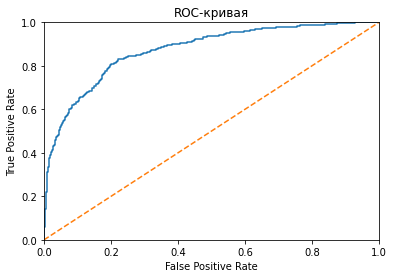

0.8726169128116905

In [29]:
probabilities_valid = model_forest.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(test_answers, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()
roc_auc_score(test_answers, probabilities_one_valid)

In [30]:
f1_score(test_answers, model_forest.predict(test_features))

0.6205450733752621

Уже лучше, поробуем теперь дропнуть часть нулевых строк

In [31]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [32]:
features_downsampled, target_downsampled = downsample(train_features, train_answers, 0.25)

In [33]:
%%time
parametrs = { 'max_depth': range (5,15, 2),
              'min_samples_leaf': range (5,8),
              'min_samples_split': range (2,10,2),
              'n_estimators' : [100]}
model_forest = GridSearchCV(RandomForestClassifier(random_state=46812), parametrs)
model_forest.fit(features_downsampled, target_downsampled)
model_forest.best_params_

CPU times: user 1min 14s, sys: 436 ms, total: 1min 15s
Wall time: 1min 15s


{'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

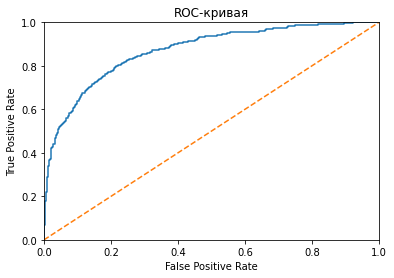

0.8703291977081542

In [34]:
probabilities_valid = model_forest.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(test_answers, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()
roc_auc_score(test_answers, probabilities_one_valid)

In [35]:
f1_score(test_answers, model_forest.predict(test_features))

0.5980066445182725

Рещультат хуже, значит будем использовать веса.

Применять метод с добавлением строк к 1-ым считаю не удачной затеей, по скольку нельзя бюыть точно увереным в том что мы дабавляем "хорошие" строки.

### Вывод

Проведя не большую аналитику выяснили, что целевой столбец имеет дисбаланс классов, по этому применили два метода для балансировки. Лучше всего подошел вариант с весами, при нем f1 метрика показала результат 0.62, AUC-ROC 0.87 не идеально но лучше чем было изначально.

## Тестирование модели

Теперь подберем пару моделей для решения поставленой задачи. Для пробы возьмем случайный лес и логистическую модель.

In [36]:
%%time
parametrs = { 'max_depth': range (5,15, 2),
              'min_samples_leaf': range (5,8),
              'min_samples_split': range (2,10,2),
              'n_estimators' : range(50,150,20)}
model_forest = GridSearchCV(RandomForestClassifier(random_state=46812, class_weight='balanced'), parametrs)
model_forest.fit(train_features, train_answers)
model_forest.best_params_

CPU times: user 10min 22s, sys: 2.36 s, total: 10min 24s
Wall time: 10min 25s


{'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 90}

In [37]:
model_forest.best_score_

0.8443841534651655

In [38]:
f1_score(test_answers, model_forest.predict(test_features))

0.6142557651991615

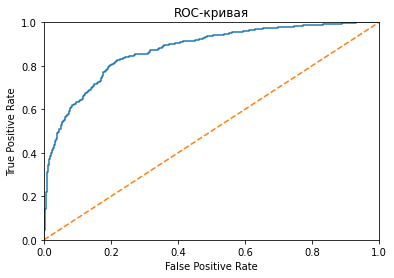

0.8727128923619716

In [39]:
probabilities_valid = model_forest.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(test_answers, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()
roc_auc_score(test_answers, probabilities_one_valid)

In [40]:
%%time
warnings.filterwarnings("ignore")
parametrs = {"solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             "max_iter": range(1000,2000,100),
             "penalty": ['l1', 'l2', 'elasticnet', 'none']}
model_LR = GridSearchCV(LogisticRegression(random_state=46812,class_weight='balanced'), parametrs)
model_LR.fit(train_features, train_answers)
model_LR.best_params_

CPU times: user 2min 39s, sys: 2min 54s, total: 5min 33s
Wall time: 5min 34s


{'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg'}

In [35]:
model_LR.best_score_

0.7076875660254356

In [36]:
f1_score(test_answers, model_LR.predict(test_features))

0.505066250974279

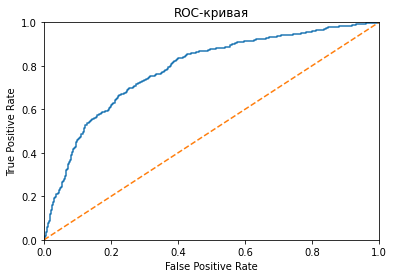

0.7842950727257705

In [37]:
probabilities_valid = model_LR.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(test_answers, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()
roc_auc_score(test_answers, probabilities_one_valid)

### Вывод

Лучше всего с этой задачей справился случайный лес показав 0.61 F1 метрики, правильные ответы 0.85 и AUC-ROC 0.87

## Вывод

Проанализировав данные, выяснил что была пропущена существенная информация о количестве лет клиента в банке, из-за чего пришлось 10% данных выкинуть.

Так-же выявилась проблема дисбаланса данных, что достаточно просто решилось применением весов.

В итоге получили слуыайны лес с хорошими показтелями и метриками. Случайны лес имел следующие параметры:
- 'max_depth': 13,
- 'min_samples_leaf': 5,
- 'min_samples_split': 2,
- 'n_estimators': 90
И показал 0.61 F1 метрики, правильные ответы 0.85 и AUC-ROC 0.87